# Notebook to check which districts are affected at landfall

In [1]:
%load_ext jupyter_black
%load_ext autoreload
%autoreload 2

In [181]:
import os
import pandas as pd
from pathlib import Path
import warnings
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import numpy as np
import matplotlib.ticker as mticker
import geopandas as gpd
from src.datasources import rsmc, helpers, codab
from src import constants

In [3]:
warnings.filterwarnings("ignore")
AA_DATA_DIR = Path(os.getenv("AA_DATA_DIR"))

In [4]:
landfall_df = pd.read_csv(
    AA_DATA_DIR / "public" / "processed" / "moz" / "landfall_time_location.csv"
)

In [209]:
adm2_path = (
    AA_DATA_DIR
    / "public"
    / "raw"
    / "moz"
    / "cod_ab"
    / "moz_admbnda_adm2_ine_20190607.shp"
)

gdf_adm2 = gpd.read_file(adm2_path)
adm1_path = (
    AA_DATA_DIR
    / "public"
    / "raw"
    / "moz"
    / "cod_ab"
    / "moz_admbnda_adm1_ine_20190607.shp"
)

gdf_adm1 = gpd.read_file(adm1_path)
gdf_adm1_sel = gdf_adm1[gdf_adm1["ADM1_PT"].isin(constants.ADMS)]

In [23]:
df_rsmc = pd.read_parquet(
    rsmc.DATA_DIR
    / "private"
    / "processed"
    / "moz"
    / "rsmc"
    / "rsmc_forecasts_interp_distances_withradius.parquet"
)
df_rsmc_lt0 = df_rsmc[df_rsmc["lt_hour"] == 0]

In [91]:
df_rsmc_lt0[df_rsmc_lt0["name"] == "DINEO"]

,valid_time,lt_hour,latitude,longitude,max_wind_kt,radius_max_wind_nm,season,name,numberseason,issue_time,MZ03_distance_km,MZ07_distance_km,MZ09_distance_km,MZ11_distance_km,min_distance,second_min_distance
228718,2017-02-13 00:00:00,0.0,-21.30,40.70,25.0,15,20162017,DINEO,0520162017,2017-02-13 00:00:00+00:00,580.007050,546.372038,583.809673,536.836681,536.836681,536.836681
228935,2017-02-13 06:00:00,0.0,-21.47,39.87,25.0,15,20162017,DINEO,0520162017,2017-02-13 06:00:00+00:00,486.876665,544.524833,516.637426,501.545948,486.876665,486.876665
229104,2017-02-13 12:00:00,0.0,-21.56,39.95,40.0,15,20162017,DINEO,0520162017,2017-02-13 12:00:00+00:00,495.000654,556.545582,530.179966,515.239495,495.000654,495.000654
229273,2017-02-13 18:00:00,0.0,-21.52,39.64,45.0,15,20162017,DINEO,0520162017,2017-02-13 18:00:00+00:00,461.171350,547.259386,499.814279,485.762153,461.171350,461.171350
229442,2017-02-14 00:00:00,0.0,-21.54,39.35,45.0,15,20162017,DINEO,0520162017,2017-02-14 00:00:00+00:00,428.867465,547.329765,475.090082,463.617713,428.867465,428.867465
229563,2017-02-14 06:00:00,0.0,-22.34,38.82,50.0,22,20162017,DINEO,0520162017,2017-02-14 06:00:00+00:00,364.667646,643.849637,443.463591,498.877257,364.667646,364.667646
229756,2017-02-14 12:00:00,0.0,-22.19,38.87,55.0,22,20162017,DINEO,0520162017,2017-02-14 12:00:00+00:00,369.931043,625.541081,442.214917,487.272421,369.931043,369.931043
229901,2017-02-14 18:00:00,0.0,-22.50,38.39,55.0,25,20162017,DINEO,0520162017,2017-02-14 18:00:00+00:00,314.331245,667.389766,407.968612,490.473221,314.331245,314.331245
229998,2017-02-15 00:00:00,0.0,-22.73,37.76,60.0,25,20162017,DINEO,0520162017,2017-02-15 00:00:00+00:00,241.137236,706.801421,362.709127,486.956793,241.137236,241.137236
230095,2017-02-15 06:00:00,0.0,-22.90,37.10,60.0,25,20162017,DINEO,0520162017,2017-02-15 06:00:00+00:00,166.537067,745.869007,321.160212,487.307242,166.537067,166.537067


In [92]:
landfall_df.columns

Index(['ISO_TIME', 'SID', 'SEASON', 'NUMBER', 'BASIN', 'SUBBASIN', 'NAME',
       'NATURE', 'LAT', 'LON',
       ...
       'year', 'month', 'day', 'hour', 'min', 'geometry', 'date', 'ADM1_PT',
       'actual_within_land', 'point_location'],
      dtype='object', length=184)

Wind Speed

In [93]:
# Convert the date columns to datetime format if they are not already
df_rsmc_lt0["valid_time"] = pd.to_datetime(
    df_rsmc_lt0["valid_time"]
).dt.tz_localize(None)
landfall_df["ISO_TIME"] = pd.to_datetime(landfall_df["ISO_TIME"])

# Step 1: Define the time window around each landfall
time_window = pd.Timedelta(days=0.25)  # Change the number of days as needed

# Step 2: Initialize an empty list to collect filtered data
filtered_data = []

# Step 3: Iterate over each landfall date to filter df_rsmc
for landfall_time in landfall_df["ISO_TIME"]:
    # Define the start and end of the time window
    start_time = landfall_time - time_window
    end_time = landfall_time + time_window

    # Filter df_rsmc for this time window
    filtered = df_rsmc_lt0[
        (df_rsmc_lt0["valid_time"] >= start_time)
        & (df_rsmc_lt0["valid_time"] <= end_time)
    ]

    # Append the filtered data to the list
    filtered_data.append(filtered)

# Step 4: Concatenate all filtered DataFrames into a single DataFrame
final_filtered_df = pd.concat(filtered_data, ignore_index=True)

In [94]:
final_filtered_df[final_filtered_df["name"] == "IDAI"]

,valid_time,lt_hour,latitude,longitude,max_wind_kt,radius_max_wind_nm,season,name,numberseason,issue_time,MZ03_distance_km,MZ07_distance_km,MZ09_distance_km,MZ11_distance_km,min_distance,second_min_distance
13,2019-03-04 12:00:00,0.0,-17.94,37.15,30.0,15,20182019,IDAI,1120182019,2019-03-04 12:00:00+00:00,421.191449,252.599099,129.871421,9.628806,9.628806,9.628806
14,2019-03-14 18:00:00,0.0,-19.81,35.58,90.0,20,20182019,IDAI,1120182019,2019-03-14 18:00:00+00:00,145.051299,522.978457,43.526207,124.193582,43.526207,43.526207
15,2019-03-15 00:00:00,0.0,-19.74,34.82,90.0,15,20182019,IDAI,1120182019,2019-03-15 00:00:00+00:00,147.747592,584.957742,0.000000,177.550754,0.000000,147.747592


No Buffer

In [185]:
# Step 1: Convert radius from nautical miles to km
final_filtered_df["radius_max_wind_nm"] = pd.to_numeric(
    final_filtered_df["radius_max_wind_nm"], errors="coerce"
)

# Now create the new column for radius in kilometers
final_filtered_df["radius_max_wind_km"] = (
    final_filtered_df["radius_max_wind_nm"] * 1.852
)

# Step 2: Create a GeoDataFrame for the storm locations (without buffer)
storm_gdf_no_buffer = gpd.GeoDataFrame(
    final_filtered_df,
    geometry=gpd.points_from_xy(
        final_filtered_df["longitude"], final_filtered_df["latitude"]
    ),
    crs="EPSG:4326",  # Assuming WGS 84
)

# Step 3: Perform a spatial join to find which districts intersect with the storm points directly (no buffer)
districts_within_radius_no_buffer = gpd.sjoin(
    gdf_adm2,
    storm_gdf_no_buffer,
    how="inner",
    predicate="intersects",
)

# Step 4: Filter for districts where ADM1_PT is in constants.ADMS
districts_filtered = districts_within_radius_no_buffer[
    districts_within_radius_no_buffer["ADM1_PT"].isin(constants.ADMS)
]

# Step 5: Count the number of unique admin 2 districts for each storm location and time step (without buffer)
district_count_no_buffer = (
    districts_filtered.groupby(["name", "valid_time", "max_wind_kt"])
    .agg({"ADM2_PT": "nunique"})
    .reset_index()
)

district_count_no_buffer.columns = [
    "name",
    "valid_time",
    "max_wind_kt",
    "district_count",
]  # Rename for clarity

# Step 6: Calculate the overall average number of districts across all time steps (no buffer)
average_districts_no_buffer = district_count_no_buffer["district_count"].mean()

# Step 7: Print the results
print("District Count by Storm and Time Step (Without Buffer):")
print(district_count_no_buffer)

print(
    f"\nOverall Average Number of Districts Without Buffer: {average_districts_no_buffer:.0f}"
)

District Count by Storm and Time Step (Without Buffer):
      name          valid_time  max_wind_kt  district_count
0      ANA 2022-01-24 12:00:00         40.0               1
1  CHALANE 2020-12-30 06:00:00         45.0               1
2  DESMOND 2019-01-22 00:00:00         35.0               1
3    DINEO 2017-02-15 18:00:00         65.0               1
4   ELOISE 2021-01-23 06:00:00         45.0               1
5   FILIPO 2024-03-12 06:00:00         45.0               1
6   FREDDY 2023-03-11 18:00:00         80.0               1
7    GOMBE 2022-03-11 06:00:00         60.0               1
8     IDAI 2019-03-15 00:00:00         90.0               1

Overall Average Number of Districts Without Buffer: 1


With Buffer

In [186]:
# Step 1: Convert radius from nautical miles to km
final_filtered_df["radius_max_wind_nm"] = pd.to_numeric(
    final_filtered_df["radius_max_wind_nm"], errors="coerce"
)

# Now create the new column for radius in kilometers
final_filtered_df["radius_max_wind_km"] = (
    final_filtered_df["radius_max_wind_nm"] * 1.852
)

# Step 2: Create a GeoDataFrame for the storm locations
storm_gdf = gpd.GeoDataFrame(
    final_filtered_df,
    geometry=gpd.points_from_xy(
        final_filtered_df["longitude"], final_filtered_df["latitude"]
    ),
    crs="EPSG:4326",  # Assuming WGS 84
)

# Step 3: Create buffers around the storm points (with a very small tolerance to keep the point)
storm_gdf["buffer"] = storm_gdf.geometry.buffer(
    storm_gdf["radius_max_wind_km"] / 110.574
    + 0.0001  # Small addition ensures the point stays within the buffer
)

# Step 4: Perform a spatial join to find which districts intersect with the buffered areas for all storms
districts_within_radius_all = gpd.sjoin(
    gdf_adm2,
    storm_gdf.set_geometry("buffer"),
    how="inner",
    predicate="intersects",
)

# Step 5: Filter for districts where ADM1_PT is in constants.ADMS
districts_filtered_all = districts_within_radius_all[
    districts_within_radius_all["ADM1_PT"].isin(constants.ADMS)
]

# Step 6: Count the number of unique admin 2 districts for each storm location and time step (all wind speeds)
district_count_all = (
    districts_filtered_all.groupby(["name", "valid_time", "max_wind_kt"])
    .agg({"ADM2_PT": "nunique"})
    .reset_index()
)

district_count_all.columns = [
    "name",
    "valid_time",
    "max_wind_kt",
    "district_count",
]

# Step 7: Filter for wind speeds above 48 knots
storm_gdf_filtered = storm_gdf[storm_gdf["max_wind_kt"] > 48]

# Step 8: Perform a spatial join to find which districts intersect with the buffered areas (wind speed > 48 knots)
districts_within_radius_filtered = gpd.sjoin(
    gdf_adm2,
    storm_gdf_filtered.set_geometry("buffer"),
    how="inner",
    predicate="intersects",
)

# Step 9: Filter for districts where ADM1_PT is in constants.ADMS
districts_filtered_filtered = districts_within_radius_filtered[
    districts_within_radius_filtered["ADM1_PT"].isin(constants.ADMS)
]

# Step 10: Count the number of unique admin 2 districts for each storm location and time step (wind speed > 48 knots)
district_count_filtered = (
    districts_filtered_filtered.groupby(["name", "valid_time", "max_wind_kt"])
    .agg({"ADM2_PT": "nunique"})
    .reset_index()
)

district_count_filtered.columns = [
    "name",
    "valid_time",
    "max_wind_kt",
    "district_count",
]

# Step 11: Calculate the overall average number of districts across all time steps for both cases
average_districts_all = district_count_all["district_count"].mean()
average_districts_filtered = district_count_filtered["district_count"].mean()

# Step 12: Print the results
print(
    f"\nOverall Average Number of Districts within Radius (All Wind Speeds): {average_districts_all:.0f}"
)

print(
    f"\nOverall Average Number of Districts within Radius (Wind Speed > 48 knots): {average_districts_filtered:.0f}"
)


Overall Average Number of Districts within Radius (All Wind Speeds): 3

Overall Average Number of Districts within Radius (Wind Speed > 48 knots): 3


In [195]:
district_count_all

,name,valid_time,max_wind_kt,district_count
0,CHALANE,2020-12-30 06:00:00,45.0,4
1,DANDO,2012-01-16 06:00:00,45.0,2
2,DINEO,2017-02-15 18:00:00,65.0,2
3,ELOISE,2021-01-23 00:00:00,80.0,2
4,FILIPO,2024-03-12 00:00:00,55.0,3
5,FILIPO,2024-03-12 06:00:00,45.0,3
6,FREDDY,2023-03-11 18:00:00,80.0,5
7,GOMBE,2022-03-11 00:00:00,90.0,2
8,GOMBE,2022-03-11 06:00:00,60.0,5
9,IDAI,2019-03-04 12:00:00,30.0,5


In [196]:
district_count_filtered

,name,valid_time,max_wind_kt,district_count
0,DINEO,2017-02-15 18:00:00,65.0,2
1,ELOISE,2021-01-23 00:00:00,80.0,2
2,FILIPO,2024-03-12 00:00:00,55.0,3
3,FREDDY,2023-03-11 18:00:00,80.0,5
4,GOMBE,2022-03-11 00:00:00,90.0,2
5,GOMBE,2022-03-11 06:00:00,60.0,5
6,IDAI,2019-03-15 00:00:00,90.0,3


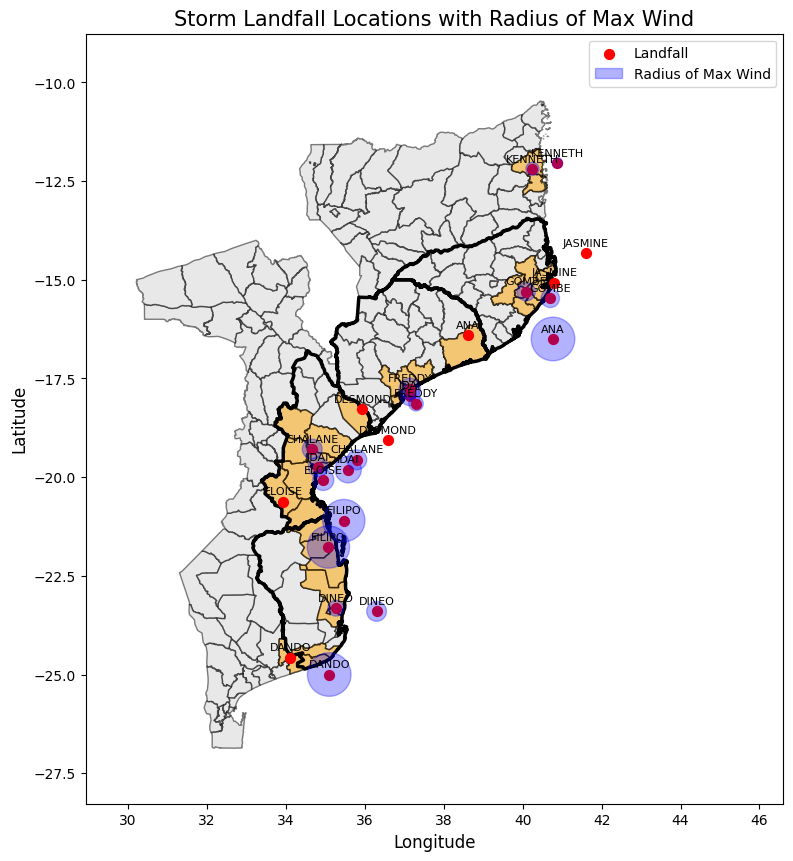

In [214]:
# Step 1: Filter storm_gdf to exclude points with longitude above 50
filtered_storm_gdf = storm_gdf[storm_gdf["longitude"] <= 50]

# Step 2: Create buffers for the filtered storm points
filtered_storm_gdf["buffer"] = filtered_storm_gdf.geometry.buffer(
    filtered_storm_gdf["radius_max_wind_km"] / 110.574 + 0.0001
)

# Step 3: Perform a spatial join to find districts that intersect with the storm buffers
districts_within_buffer = gpd.sjoin(
    gdf_adm2,
    filtered_storm_gdf.set_geometry("buffer"),
    how="inner",
    predicate="intersects",
)

# Step 4: Perform a spatial join to find districts that intersect with the storm landfall points
districts_with_landfall = gpd.sjoin(
    gdf_adm2,
    filtered_storm_gdf,
    how="inner",
    predicate="intersects",
)

# Combine both intersections to get unique highlighted districts
highlighted_districts = pd.concat(
    [districts_within_buffer, districts_with_landfall]
)["ADM2_PT"].unique()

# Step 5: Set up the plot
fig, ax = plt.subplots(figsize=(9, 10))

# Step 6: Plot ADM2 districts with different colors
gdf_adm2.plot(
    ax=ax, color="lightgray", edgecolor="black", alpha=0.5
)  # All districts

# Highlight only the districts that are within the storm buffers or touched by landfall points
gdf_adm2[gdf_adm2["ADM2_PT"].isin(highlighted_districts)].plot(
    ax=ax, color="orange", edgecolor="black", alpha=0.5
)

# Step 7: Plot ADM1 districts with no fill and thicker borders
gdf_adm1_sel.plot(
    ax=ax, edgecolor="black", linewidth=2.5, facecolor="none"
)  # Thick borders, no fill

# Step 8: Plot landfall locations, their radii, and annotate with cyclone names
for idx, row in filtered_storm_gdf.iterrows():
    # Set radius and ensure it's at least 1 km
    radius = row["radius_max_wind_km"] / 110.574  # Convert km to degrees

    # Plot the landfall location
    plt.scatter(
        row["longitude"],  # Longitude of the landfall
        row["latitude"],  # Latitude of the landfall
        color="red",
        s=50,
        label=(
            "Landfall" if idx == 0 else ""
        ),  # Add label only for the first point
    )

    # Annotate with the cyclone name
    plt.annotate(
        row["name"],  # Cyclone name
        (row["longitude"], row["latitude"]),
        textcoords="offset points",
        xytext=(0, 5),  # Move text slightly above the point
        ha="center",
        fontsize=8,
        color="black",
    )

    # Plot a circle for the radius of max wind in km
    circle = plt.Circle(
        (row["longitude"], row["latitude"]),
        radius,
        color="blue",
        alpha=0.3,
        label=(
            "Radius of Max Wind" if idx == 0 else ""
        ),  # Add label only for the first circle
    )
    ax.add_patch(circle)

# Add labels and title
plt.title("Storm Landfall Locations with Radius of Max Wind", fontsize=15)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)

# Set legend position to bottom right
plt.legend()

# Set equal aspect ratio to ensure circles appear circular
ax.set_aspect("equal", adjustable="datalim")
plt.xlim(
    filtered_storm_gdf["longitude"].min() - 5,
    filtered_storm_gdf["longitude"].max() + 5,
)  # Adjust limits if necessary
plt.ylim(
    filtered_storm_gdf["latitude"].min() - 5,
    filtered_storm_gdf["latitude"].max() + 5,
)  # Adjust limits if necessary

# Display the plot
plt.show()

Rainfall

In [219]:
# Step 1: Calculate the buffer distance in degrees (250 km / 110 km/degree)
buffer_distance_degrees = (
    250 / 110.574
)  # Approximate conversion from km to degrees

# Step 2: Create a GeoDataFrame for landfall points
landfall_gdf = gpd.GeoDataFrame(
    landfall_df,
    geometry=gpd.points_from_xy(landfall_df["LON"], landfall_df["LAT"]),
    crs="EPSG:4326",  # Assuming the original CRS is in WGS84 (EPSG:4326)
)

# Step 3: Buffer each landfall point by the calculated distance
landfall_gdf["buffer"] = landfall_gdf.geometry.buffer(buffer_distance_degrees)

# Step 4: Perform a spatial join to find which districts intersect with the buffered areas
districts_within_buffer = gpd.sjoin(
    gdf_adm2,
    landfall_gdf.set_geometry("buffer"),
    how="inner",
    predicate="intersects",
)

# Step 5: Filter districts to include only those in constants.ADMS
filtered_districts = districts_within_buffer[
    districts_within_buffer["ADM1_PT_left"].isin(constants.ADMS)
]

# Step 6: Count the number of districts for each landfall
district_count_per_landfall = (
    filtered_districts.groupby("NAME")
    .size()
    .reset_index(name="district_count")
)

# Step 7: Calculate the average number of districts across all landfalls
average_districts = district_count_per_landfall["district_count"].mean()

# Print the average number of districts
print(
    f"Average number of districts within 250 km of landfalls: {average_districts:.0f}"
)

Average number of districts within 250 km of landfalls: 21


In [220]:
district_count_per_landfall

,NAME,district_count
0,ANA,29
1,CHALANE,26
2,DANDO,12
3,DELIWE,20
4,DESMOND,26
5,DINEO,14
6,ELOISE,20
7,FAVIO,17
8,FILIPO,15
9,FREDDY,29


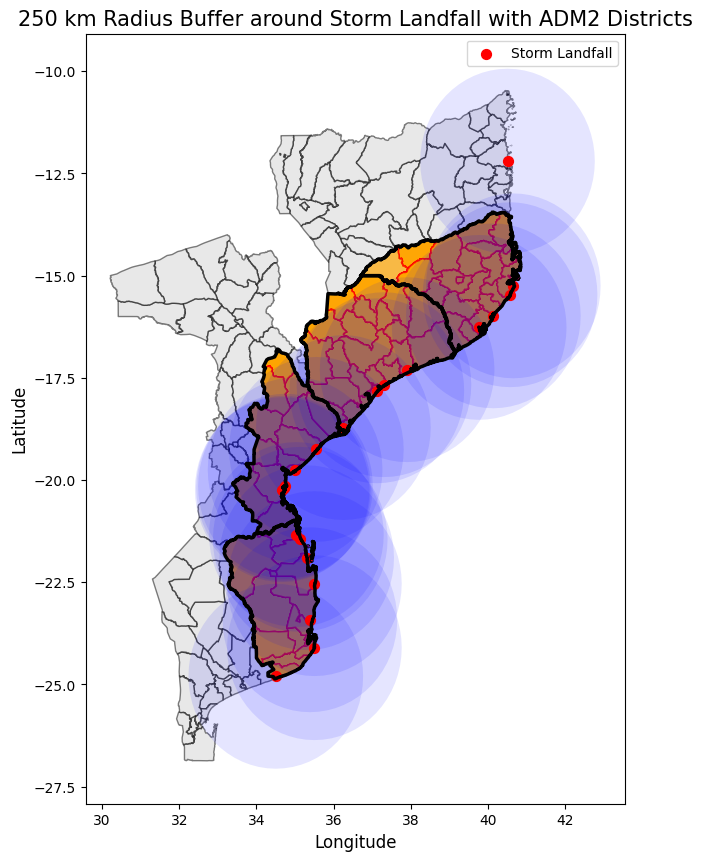

In [229]:
# Step 5: Plotting

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(8, 10))

# Plot the administrative boundaries (ADM2)
gdf_adm2.plot(ax=ax, color="lightgray", edgecolor="black", alpha=0.5)


# Plot the districts that intersect with the buffer, only those in constants.ADMS
districts_within_buffer[
    districts_within_buffer["ADM1_PT_left"].isin(constants.ADMS)
].plot(ax=ax, color="orange", edgecolor="red", alpha=0.7)

# Plot the buffer around the storm point
landfall_gdf.set_geometry("buffer").plot(ax=ax, color="blue", alpha=0.1)

# Plot the landfall points (storm location)
landfall_gdf.plot(ax=ax, color="red", markersize=50, label="Storm Landfall")
gdf_adm1_sel.plot(
    ax=ax, edgecolor="black", linewidth=2.5, facecolor="none"
)  # Thick borders, no fill

# Adding labels and title
plt.title(
    "250 km Radius Buffer around Storm Landfall with ADM2 Districts",
    fontsize=15,
)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.legend()

# Display the plot
plt.show()

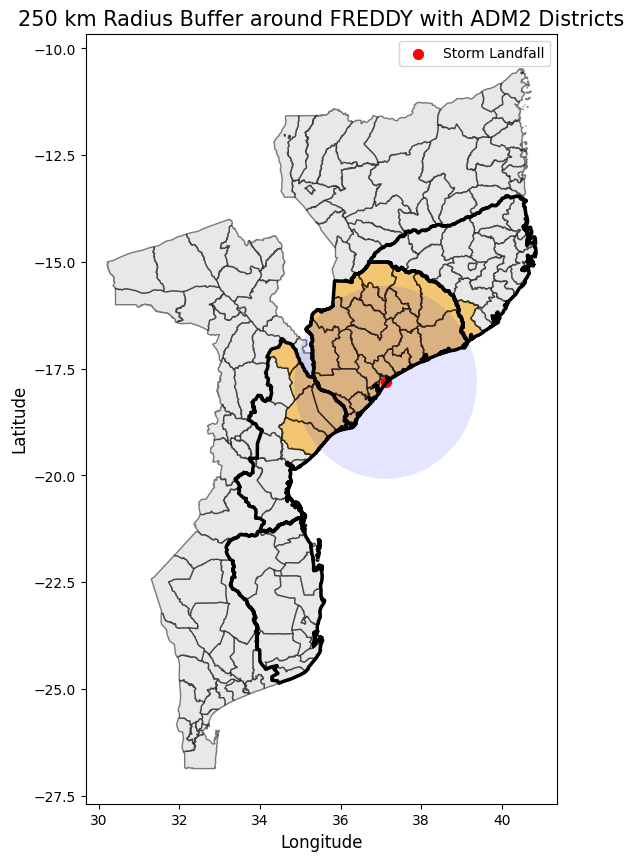

In [234]:
# Filter for a specific storm (replace 'Storm_Name' with the actual storm name)
storm_name = "FREDDY"  # Replace with the actual storm name

# Step 5: Plotting

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(8, 10))

# Plot the administrative boundaries (ADM2)
gdf_adm2.plot(ax=ax, color="lightgray", edgecolor="black", alpha=0.5)

# Filter districts within buffer for the specific storm
districts_within_buffer_specific = districts_within_buffer[
    districts_within_buffer["NAME"].isin(
        landfall_gdf[landfall_gdf["NAME"] == storm_name]["NAME"]
    )
]

# Plot the districts that intersect with the buffer, only those in constants.ADMS
districts_within_buffer_specific[
    districts_within_buffer_specific["ADM1_PT_left"].isin(constants.ADMS)
].plot(ax=ax, color="orange", edgecolor="black", alpha=0.5)

# Filter landfall_gdf for the specific storm
landfall_gdf_specific = landfall_gdf[landfall_gdf["NAME"] == storm_name]

# Plot the buffer around the storm point
landfall_gdf_specific.set_geometry("buffer").plot(
    ax=ax, color="blue", alpha=0.1
)

# Plot the landfall points (storm location)
landfall_gdf_specific.plot(
    ax=ax, color="red", markersize=50, label="Storm Landfall"
)

# Plot the ADM1 boundaries with thick borders, no fill
gdf_adm1_sel.plot(
    ax=ax, edgecolor="black", linewidth=2.5, facecolor="none"
)  # Thick borders, no fill

# Adding labels and title
plt.title(
    f"250 km Radius Buffer around {storm_name} with ADM2 Districts",
    fontsize=15,
)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.legend()

# Display the plot
plt.show()